#### Word Embeddings are an improvement on text data representation models like the BoW model which use word frequencies and other such metrics to generate large sparse vectors that do not really capture much about the meaning of the words in the text.

#### A vector space representation of words keeps the context information intact, thereby giving meaning insights into each word and locally clustering similar words together. 

#### There are two popular word embedding methods - word2vec developed by Google and GloVe developed by Stanford.

#### Gensim supports an implementation of word2vec word embeddings that help learn word vectors from text.

#### There are two main training algorithms to learn word embeddings from text - Continuous Bag of Words(CBOW) and Skipgrams. The gensim implmentation supports both the algorithms. To simplify - the algorithm entails looking at a window of words for each target word and computing the context based meaning of the word. 

#### Parameters for model training - (1) size(default 100 : the dimensions of the vector space); (2) window(default 5 : the maximum distance between a target word and the surrounding words); (3) min_count(default 5 : the minimum number of words to be considered while training the model, words that occur less than min_count number of times will be ignored); (4) workers(default 3 : number of cores to run computation on, depends on your computer); (5) sg(default 0 : 0 for CBOW and 1 for Skipgram).

In [1]:
import warnings
warnings.filterwarnings('ignore')
from gensim.models import Word2Vec

In [2]:
text = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

In [3]:
## Sentence splitting

sentences = text.split(',')

## Lower casing

sentences = [i.lower() for i in sentences]

## Word tokenizing 
from nltk.tokenize import word_tokenize
from string import punctuation
puncts = list(set(punctuation))
puncts.append('–')

## Creating final documents to build model on

docs = [word_tokenize(i) for i in sentences]

In [4]:
## Removing punctuations

for i in docs:
    for j in i:
        if j in puncts:
            i.remove(j)

In [5]:
## Printing the docs

for i in docs:
    print(i,'\n')

['it', 'was', 'the', 'best', 'of', 'times'] 

['it', 'was', 'the', 'worst', 'of', 'times'] 

['it', 'was', 'the', 'age', 'of', 'wisdom'] 

['it', 'was', 'the', 'age', 'of', 'foolishness'] 

['it', 'was', 'the', 'epoch', 'of', 'belief'] 

['it', 'was', 'the', 'epoch', 'of', 'incredulity'] 

['it', 'was', 'the', 'season', 'of', 'light'] 

['it', 'was', 'the', 'season', 'of', 'darkness'] 

['it', 'was', 'the', 'spring', 'of', 'hope'] 

['it', 'was', 'the', 'winter', 'of', 'despair'] 

['we', 'had', 'everything', 'before', 'us'] 

['we', 'had', 'nothing', 'before', 'us'] 

['we', 'were', 'all', 'going', 'direct', 'to', 'heaven'] 

['we', 'were', 'all', 'going', 'direct', 'the', 'other', 'way', 'in', 'short'] 

['the', 'period', 'was', 'so', 'far', 'like', 'the', 'present', 'period'] 

['that', 'some', 'of', 'its', 'noisiest', 'authorities', 'insisted', 'on', 'its', 'being', 'received'] 

['for', 'good', 'or', 'for', 'evil'] 

['in', 'the', 'superlative', 'degree', 'of', 'comparison', 'only

In [10]:
## Training the model 

model = Word2Vec(docs, min_count=1, sg=1)

In [11]:
print(model)

Word2Vec(vocab=58, size=100, alpha=0.025)


In [12]:
words = list(model.wv.vocab)

In [13]:
print(len(words))
print('==============')
for i in words:
    print(i,end=' ')

58
it was the best of times worst age wisdom foolishness epoch belief incredulity season light darkness spring hope winter despair we had everything before us nothing were all going direct to heaven other way in short period so far like present that some its noisiest authorities insisted on being received for good or evil superlative degree comparison only 

In [15]:
## Printing the word vector for a single word :

print(model['it'])

[ 4.8950058e-03 -4.1112956e-03  1.4554379e-03 -5.0627178e-04
 -4.0369509e-03  1.6781767e-03  2.5097104e-03  4.9559702e-03
 -1.7773520e-03 -2.2642054e-03 -3.4675468e-03  2.8839244e-03
  4.6896348e-03 -3.3414105e-04  1.4349207e-03 -1.4440786e-03
 -4.0958328e-03 -3.7404392e-03  3.2709844e-03 -3.1373068e-03
  8.6947519e-04  1.7419308e-05  4.7796369e-03  4.4654533e-03
  3.8997382e-03 -1.7988129e-03  3.9428431e-03 -3.3691807e-03
 -4.6528047e-03 -4.2071356e-03 -4.7208448e-03 -1.8744634e-03
 -6.4305949e-04 -3.7703447e-03 -1.8553637e-03  2.2700455e-03
  4.4762641e-03 -4.1368045e-03 -1.7325841e-04  4.1571702e-03
  3.5971496e-03 -1.2290915e-03 -4.1834051e-03 -2.4079103e-03
  3.9858907e-03 -3.4327337e-03  2.3536910e-03 -3.3645367e-03
  6.7434815e-04  4.4403630e-03 -3.4916515e-03  4.0664417e-03
 -3.2619629e-03 -5.1560596e-04 -3.2136086e-03  3.9152121e-03
 -6.6092884e-04  6.0073711e-05  3.7634366e-03  1.2158523e-03
  2.2400517e-03 -2.2395186e-03 -3.7996983e-03 -1.2677668e-03
 -1.3052355e-03 -2.24185

In [16]:
model.save('model_atotc.bin')

In [17]:
model_atotc = Word2Vec.load('model_atotc.bin')

In [18]:
print(model_atotc)

Word2Vec(vocab=58, size=100, alpha=0.025)


#### Visualizing the model using PCA :

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [25]:
X = model_atotc[model_atotc.wv.vocab]

In [26]:
pca = PCA(n_components=2)

In [27]:
result = pca.fit_transform(X)

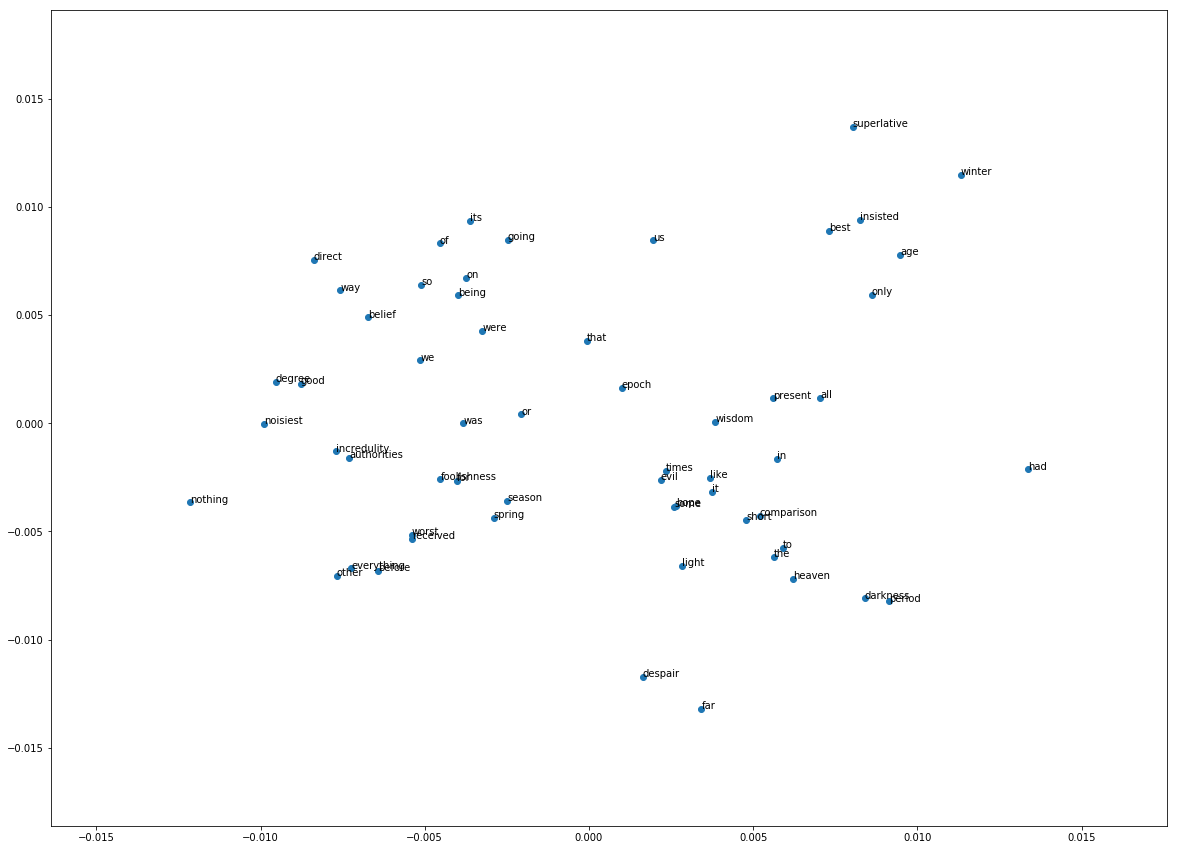

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,15

plt.scatter(result[:,0],result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0],result[i,1]))
plt.show()

In [30]:
test = model_atotc.most_similar(positive=['best'], negative=['worst'], topn=1)
print(test)

[('winter', 0.34498167037963867)]
